## General Fire Incident Statistics

In [6]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sbn
from scipy import stats

In [7]:
# Importing the cleaned/combined data from the csv with the years 2008-2018

firefile = './output/all_with_no_incident_nulls.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
len(df)


/Users/laura/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


159803

In [8]:
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df['Year'] = df['Year'].astype(float).map("{:.0f}".format)
df.dtypes

OBJECTID                              int64
address                              object
address2                             object
apt_room                             object
arrive_date_time             datetime64[ns]
cleared_date_time            datetime64[ns]
dispatch_date_time           datetime64[ns]
exposure                              int64
incident_number                      object
incident_type                       float64
incident_type_description            object
platoon                              object
station                             float64
Longitude                            object
Latitude                             object
Year                                 object
Date                                 object
dtype: object

In [9]:
# Adding bins for later analysis

bins = [100, 199, 299, 499, 599, 699, 799, 899, 9999]
labels = ["Fire", "Overpressure Rupture/Explosion (No Fire)", "Hazardous Condition (No Fire)", "Service Call", "Good Intent Call", "False Alarm and False Call",
        "Severe Weather/Natural Disaster", "Special Incident Type"]
df["Incident"] = pd.cut(df["incident_type"], bins, labels=labels)
df.head()

,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Incident
0,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22.0,-78.5373,35.8916,2013,2013-10-19,Fire
1,474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",NaN,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510.0,Person in distress Other,A,4.0,-78.6476,35.8782,2014,2014-02-14,Service Call
2,474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",NaN,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440.0,Electrical wiring/equipment problem Other,A,1.0,-78.634,35.7654,2012,2012-04-29,Hazardous Condition (No Fire)
3,474772,"7628 VALVIEW ST RALEIGH, NC 27601",NaN,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561.0,Unauthorized burning,A,18.0,-78.6914,35.8844,2012,2012-04-28,Service Call
4,474773,"4201 MANGROVE DR RALEIGH, NC 27603",NaN,,2014-01-26 22:35:00,2014-01-26 22:38:00,2014-01-26 22:31:00,0,14-0002916,520.0,Water problem Other,B,28.0,-78.5166,35.8727,2014,2014-01-26,Service Call


## Total fire incidents per year

In [10]:
df_year = df.groupby('Year')['OBJECTID'].count()
df_year

Year
2008    13705
2009    13028
2010    13531
2011    13893
2012    13607
2013    13943
2014    14415
2015    15130
2016    15746
2017    18151
2018    14654
Name: OBJECTID, dtype: int64

In [11]:
ymean = round(df_year.mean(),2)
ymed = round(df_year.median(),2)
sdev = round(df_year.std(),2)
serr = round(df_year.sem(),2)
message = f'Raleigh FD had a mean incident rate of {ymean} per year, median {ymed}, with a standard deviation of {sdev} and error {serr}'
print(message)

Raleigh FD had a mean incident rate of 14527.55 per year, median 13943.0, with a standard deviation of 1432.33 and error 431.86


In [12]:
ymax = df_year.max()
ymin = df_year.min()
message2 = f'The most incidents came in 2017 when there were {ymax}, the minimum in 2009 when there were {ymin}.'
print(message2)


The most incidents came in 2017 when there were 18151, the minimum in 2009 when there were 13028.


In [14]:
year_inc = df.groupby(['Year','Incident'])['OBJECTID'].count().unstack('Incident').fillna(0)
year_inc

Incident,Fire,Overpressure Rupture/Explosion (No Fire),Hazardous Condition (No Fire),Service Call,Good Intent Call,False Alarm and False Call,Severe Weather/Natural Disaster,Special Incident Type
Year,,,,,,,,
2008,1321,58,1200,2627,3391,4907,26,59
2009,1075,50,1186,2457,3612,4450,19,68
2010,1222,57,1303,2765,3562,4456,27,42
2011,1339,69,1371,2512,3853,4587,47,34
2012,1088,82,1278,2265,3923,4857,24,36
2013,1076,100,1206,2325,4272,4860,16,32
2014,1041,90,1184,2276,4401,5313,20,31
2015,1062,90,1315,2426,4603,5548,17,23
2016,1092,89,1467,2430,4890,5640,46,30


### Charting incident counts by year and type

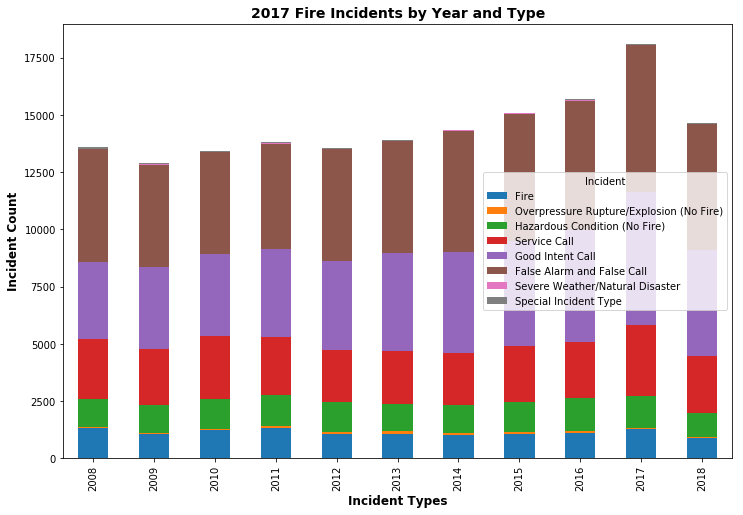

In [29]:
year_inc.plot(kind='bar', stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,3000)
fig.xlimit=(0,12)

# Add some labels and title
plt.xlabel('Incident Types', fontsize=12, fontweight='bold')
plt.ylabel('Incident Count', fontsize=12, fontweight='bold')
plt.title('2017 Fire Incidents by Year and Type', fontsize=14, fontweight='bold')
# Save the figure
# year_inc.plot(kind='bar', figsize=(10,8), use_index=True, title='Total Incidents per Year', grid=False,fontsize=12)
plt.savefig('./graphics/total_fi_year.png')

In [17]:
df["Hour"] = pd.DatetimeIndex(df['dispatch_date_time']).hour

In [18]:
hours = df.groupby(['Hour','Incident'])['OBJECTID'].count().unstack('Incident').fillna(0)
hours

Incident,Fire,Overpressure Rupture/Explosion (No Fire),Hazardous Condition (No Fire),Service Call,Good Intent Call,False Alarm and False Call,Severe Weather/Natural Disaster,Special Incident Type
Hour,,,,,,,,
0,701,48,767,1593,2329,2654,21,38
1,579,26,704,1340,2090,2319,23,22
2,507,30,543,1164,1976,1931,12,20
3,405,26,446,976,1893,1761,11,15
4,322,24,354,852,1658,1688,7,10
5,256,10,273,673,1589,1430,4,6
6,264,12,244,612,1502,1300,5,7
7,234,8,196,523,1252,1179,6,13
8,213,12,197,462,1033,1165,7,1


### Charting incidents by hour of day and type

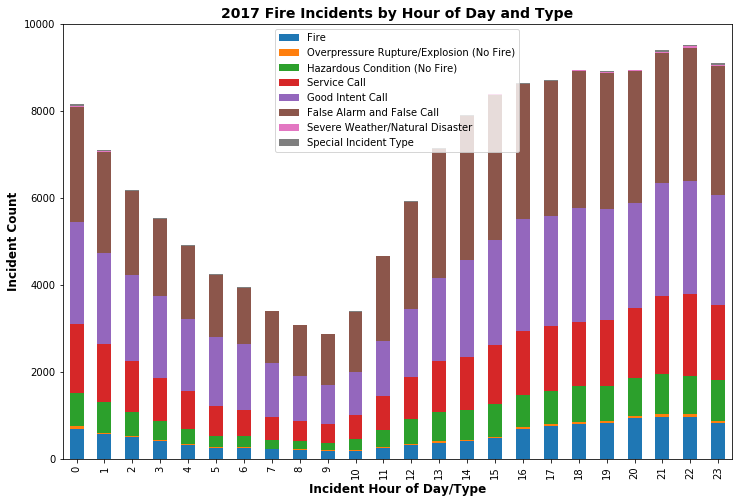

In [30]:
hours.plot(kind='bar', stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,3000)
fig.xlimit=(0,12)

# Add some labels and title
plt.xlabel('Incident Hour of Day/Type', fontsize=12, fontweight='bold')
plt.ylabel('Incident Count', fontsize=12, fontweight='bold')
plt.title('2017 Fire Incidents by Hour of Day and Type', fontsize=14, fontweight='bold')
plt.legend(loc='upper center')
# Save the figure
plt.savefig('./graphics/total_fi_by_hour.png')


In [26]:
# Add a new column for month of the year
df["Month"] = pd.DatetimeIndex(df['dispatch_date_time']).month

In [27]:
# Group all incidents by the month of the year
months = df.groupby(['Month','Incident'])['OBJECTID'].count().unstack('Incident').fillna(0)
months

Incident,Fire,Overpressure Rupture/Explosion (No Fire),Hazardous Condition (No Fire),Service Call,Good Intent Call,False Alarm and False Call,Severe Weather/Natural Disaster,Special Incident Type
Month,,,,,,,,
1,1069.0,82.0,1295.0,2827.0,4197.0,5157.0,5.0,35.0
2,1098.0,67.0,1035.0,2183.0,3578.0,4017.0,8.0,28.0
3,1271.0,49.0,1010.0,2197.0,3913.0,4156.0,4.0,36.0
4,1403.0,69.0,1170.0,2354.0,4190.0,4771.0,41.0,52.0
5,962.0,68.0,1190.0,2227.0,3845.0,4460.0,22.0,38.0
6,1053.0,52.0,1268.0,2218.0,3809.0,4802.0,41.0,32.0
7,1138.0,54.0,1337.0,2330.0,4042.0,5471.0,71.0,35.0
8,1021.0,67.0,1298.0,2392.0,4366.0,5689.0,30.0,35.0
9,817.0,60.0,1115.0,2286.0,3995.0,5038.0,19.0,23.0


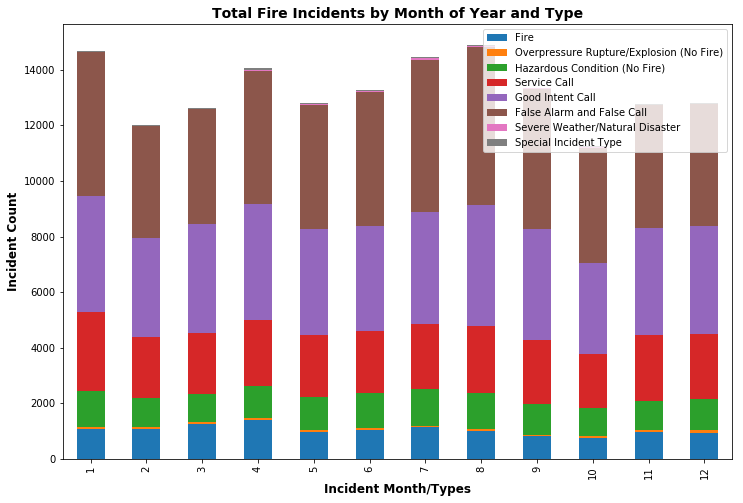

In [32]:
months.plot(kind='bar', stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,3000)
fig.xlimit=(0,12)

# Add some labels and title
plt.xlabel('Incident Month/Types', fontsize=12, fontweight='bold')
plt.ylabel('Incident Count', fontsize=12, fontweight='bold')
plt.title('Total Fire Incidents by Month of Year and Type', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
# Save the figure
plt.savefig('./graphics/total_fi_by_month.png')


### Focus in on 2017, highest number of calls

In [33]:
year2017 = df.loc[df['Year']=='2017']
len(year2017)

18151

In [34]:
year17 = year2017.groupby(['Month','Incident'])['OBJECTID'].count().unstack('Incident').fillna(0)
year17

Incident,Fire,Overpressure Rupture/Explosion (No Fire),Hazardous Condition (No Fire),Service Call,Good Intent Call,False Alarm and False Call,Severe Weather/Natural Disaster,Special Incident Type
Month,,,,,,,,
1,135.0,10.0,197.0,453.0,805.0,833.0,0.0,0.0
2,112.0,5.0,79.0,190.0,414.0,357.0,0.0,1.0
3,151.0,6.0,91.0,219.0,455.0,421.0,1.0,2.0
4,198.0,4.0,208.0,434.0,893.0,897.0,4.0,10.0
5,76.0,3.0,113.0,227.0,425.0,498.0,4.0,2.0
6,81.0,3.0,104.0,217.0,390.0,472.0,2.0,4.0
7,99.0,1.0,97.0,211.0,417.0,513.0,5.0,2.0
8,91.0,4.0,111.0,212.0,411.0,511.0,0.0,0.0
9,71.0,4.0,93.0,218.0,445.0,479.0,1.0,1.0


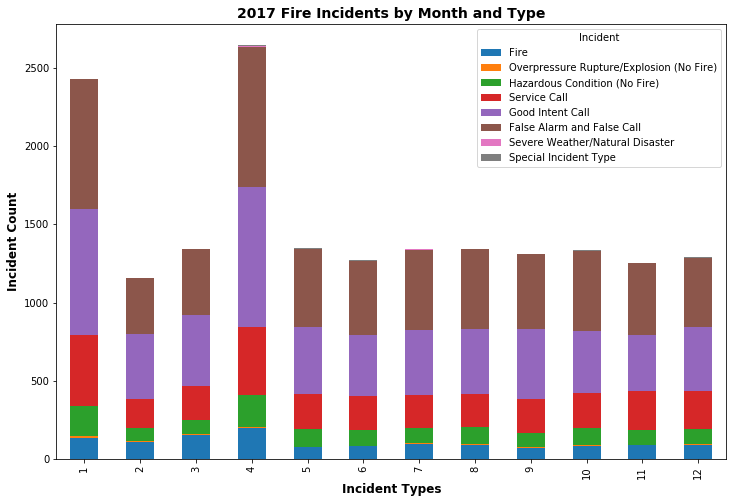

In [35]:
year17.plot(kind='bar', stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,3000)
fig.xlimit=(0,12)

# Add some labels and title
plt.xlabel('Incident Types', fontsize=12, fontweight='bold')
plt.ylabel('Incident Count', fontsize=12, fontweight='bold')
plt.title('2017 Fire Incidents by Month and Type', fontsize=14, fontweight='bold')
# Save the figure
plt.savefig('./graphics/2017_month_type_stacked.png')

## Focus in on fires

In [36]:
fires = df.loc[df['Incident']=='Fire']
len(fires)

12487

In [52]:
fire_mo = fires.groupby(['Year','Month'], sort=True)['OBJECTID'].count().unstack('Month').transpose()

fire_mo.sort_index(ascending=True)



Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,,,,
1,101.0,82.0,91.0,92.0,103.0,88.0,98.0,74.0,89.0,135.0,116.0
2,134.0,118.0,67.0,146.0,90.0,67.0,84.0,107.0,89.0,112.0,84.0
3,145.0,104.0,135.0,114.0,98.0,139.0,109.0,88.0,99.0,151.0,89.0
4,119.0,119.0,122.0,117.0,107.0,123.0,135.0,105.0,143.0,198.0,115.0
5,109.0,83.0,90.0,86.0,78.0,91.0,88.0,106.0,70.0,76.0,85.0
6,121.0,96.0,83.0,142.0,115.0,77.0,70.0,100.0,79.0,81.0,89.0
7,110.0,102.0,131.0,161.0,97.0,73.0,101.0,105.0,68.0,99.0,91.0
8,116.0,71.0,86.0,111.0,78.0,77.0,63.0,200.0,71.0,91.0,57.0
9,75.0,64.0,133.0,79.0,70.0,77.0,75.0,44.0,70.0,71.0,59.0


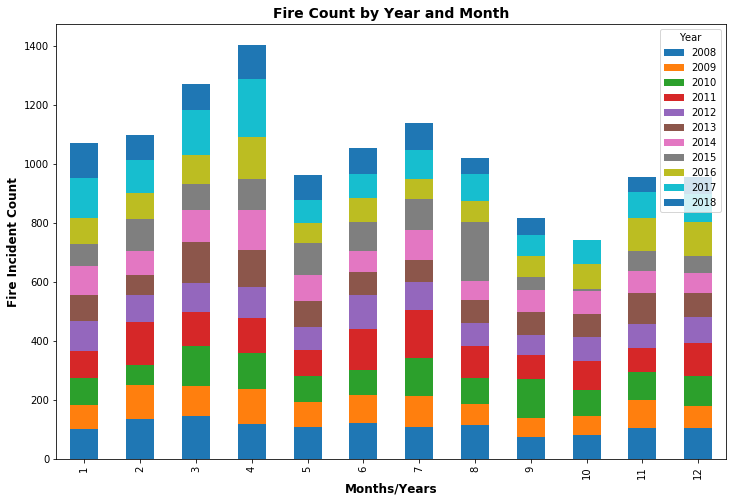

In [58]:
fire_mo.plot(kind='bar',stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,1000)
fig.xlimit=(0,30)

# Add some labels and title
plt.xlabel('Months/Years', fontsize=12, fontweight='bold')
plt.ylabel('Fire Incident Count', fontsize=12, fontweight='bold')
plt.title('Fire Count by Year and Month', fontsize=14, fontweight='bold')
# Save the figure
plt.savefig('./graphics/fires_by_year_month.png')


In [44]:
storms = df.loc[df['incident_type'] >= 800,:]

len(storms)

673

In [55]:
storms_mo = storms.groupby(['Year','Month'])['OBJECTID'].count().unstack('Month').fillna(0).transpose()

storms_mo

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,,,,
1,5.0,12.0,4.0,1.0,7.0,1.0,7.0,1.0,2.0,0.0,0.0
2,4.0,7.0,2.0,4.0,1.0,2.0,1.0,8.0,3.0,1.0,3.0
3,11.0,6.0,5.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0
4,10.0,8.0,3.0,28.0,2.0,6.0,10.0,6.0,6.0,14.0,0.0
5,6.0,12.0,9.0,5.0,3.0,2.0,5.0,3.0,5.0,6.0,4.0
6,9.0,7.0,5.0,9.0,3.0,10.0,7.0,8.0,8.0,6.0,1.0
7,14.0,14.0,17.0,6.0,17.0,7.0,4.0,5.0,14.0,7.0,1.0
8,9.0,3.0,7.0,15.0,7.0,6.0,6.0,4.0,6.0,0.0,2.0
9,4.0,2.0,5.0,3.0,9.0,5.0,1.0,2.0,4.0,2.0,5.0


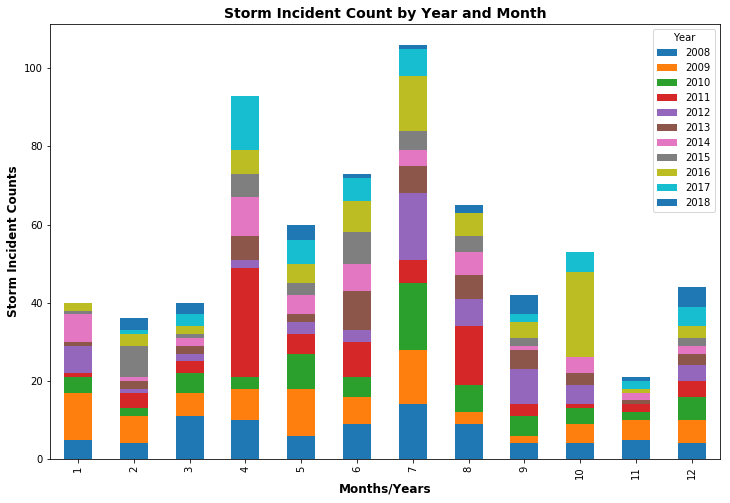

In [57]:
storms_mo.plot(kind='bar',stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,1000)
fig.xlimit=(0,30)

# Add some labels and title
plt.xlabel('Months/Years', fontsize=12, fontweight='bold')
plt.ylabel('Storm Incident Counts', fontsize=12, fontweight='bold')
plt.title('Storm Incident Count by Year and Month', fontsize=14, fontweight='bold')
# Save the figure
plt.savefig('./graphics/storms_by_year_month.png')

### Fire incidents analysis
- Fire incidents have been on the rise in Raleigh over the period of study
- Raleigh FD had a mean incident rate of 11796.55 per year, median 11529.0, with a standard deviation of 1007.42 and error 303.75
- The most incidents came in 2017 when there were 14423, the minimum in 2009 when there were 10927.
- There is a lull in non-EMS incidents from midnight to 9am, then incident counts rise through midnight.
- January and August generally have the most incidents, October has the lowest.
- When looking at only fires (codes 100-199) there doesn't seem to be a pattern by month, even though one might expect peaks around Christmas, or 4th of July.
- When looking at only storm incidents, there were a few major events visible: 
    - In April 2011 there was a tornado outbreak
    - In August 2011 Hurricane Irene 
    - In October 2016 Hurricane Matthew
    - In April 2017 there was record rainfall
    - 2018 data may be incomplete in this dataset, but there was a visible impact of Hurricane Florence in September or the snowfall in December.
- July and April are generally the biggest months for storm incidents.